# Introduction
In this dataset, each entry is a listing. Listing includes all the information for a specific customer.

Questions: 
* Is there any Seasonality in the Amount of the loan?
* How does the length of the loan (Term) affect the lenders Estimated Return?
* Does being a homeowner affect the amount people tend to borrow?
* How does the length of the loan (Term) affect the Borrower’s Annual Percentage Rate (APR)?
* Does the borrower’s stated monthly income (StatedMonthlyIncome), show any relationship to whether the borrower indicated they have the required documentation to support their income (IncomeVerifiable)?
* Does the borrowers APR and monthy payment relate to where a person is more likely to default on the loan?
* How does the interest rate for student borrowers relate to non-student borrowers?
* Does the state the borrower lives in, give any information whether they will default?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [55]:
def check_dtype(column):
    # check if convert float to int
    # if return true, means the dtype can be converted to int.
    convert = df[column].fillna(0).astype('int64').astype('float')
    if (df[column].fillna(0) == convert).all():
        print(column + ': Data type should be int')
    else: print(column + ': Keep the present data type')

In [56]:
check_column = ['CurrentCreditLines', 'OpenCreditLines','TotalCreditLinespast7years','InquiriesLast6Months', 'TotalInquiries','CurrentDelinquencies','AmountDelinquent','DelinquenciesLast7Years', 'PublicRecordsLast10Years','PublicRecordsLast12Months','RevolvingCreditBalance','AvailableBankcardCredit','TotalTrades','TradesOpenedLast6Months','TotalProsperLoans','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber']
for column in check_column:
    check_dtype(column)

CurrentCreditLines: Data type should be int
OpenCreditLines: Data type should be int
TotalCreditLinespast7years: Data type should be int
InquiriesLast6Months: Data type should be int
TotalInquiries: Data type should be int
CurrentDelinquencies: Data type should be int
AmountDelinquent: Data type should be int
DelinquenciesLast7Years: Data type should be int
PublicRecordsLast10Years: Data type should be int
PublicRecordsLast12Months: Data type should be int
RevolvingCreditBalance: Data type should be int
AvailableBankcardCredit: Data type should be int
TotalTrades: Data type should be int
TradesOpenedLast6Months: Data type should be int
TotalProsperLoans: Data type should be int
OnTimeProsperPayments: Data type should be int
ProsperPaymentsLessThanOneMonthLate: Data type should be int
ProsperPaymentsOneMonthPlusLate: Data type should be int
ScorexChangeAtTimeOfListing: Data type should be int
LoanFirstDefaultedCycleNumber: Data type should be int


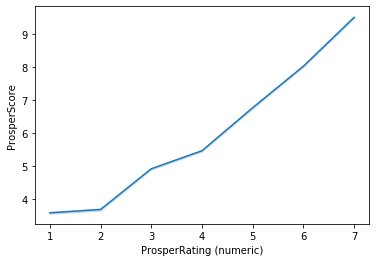

In [7]:
# check if the prosperating and prosperscore are repetitive
test = df[['ProsperRating (numeric)','ProsperScore']]
sns.lineplot(x = 'ProsperRating (numeric)', y = 'ProsperScore', data = test)
#sns.boxplot(data = test);

# Data Wrangling
### Quality issues
* ListingKey and ListingNumbers are repetitive in terms of identification of listing
* Erroneous Dtype:
    * Date: `ListingCreationDate`,`ClosedDate`,`ListingCategory (numeric)`,`DateCreditPulled`,`FirstRecordedCreditLine`,`LoanOriginationDate`
    
    * float to int: `CurrentCreditLines`, `OpenCreditLines`,`TotalCreditLinespast7years`,`InquiriesLast6Months`, `TotalInquiries`,`CurrentDelinquencies`,`AmountDelinquent`,`DelinquenciesLast7Years`, `PublicRecordsLast10Years`,`PublicRecordsLast12Months`,`RevolvingCreditBalance`,`AvailableBankcardCredit`,`TotalTrades`,`TradesOpenedLast6Months`,`TotalProsperLoans`,`OnTimeProsperPayments`,`ProsperPaymentsLessThanOneMonthLate`,`ProsperPaymentsOneMonthPlusLate`,`ScorexChangeAtTimeOfListing`,`LoanFirstDefaultedCycleNumber`
    * IncomeRange: "$0" and "Not Employed" are repetitive.

### Tidiness issues:

* repetitive: ProsperRating (numeric), ProsperRating (Alpha)
* LoanOriginationQuarter

In [8]:
col_to_date = ['ListingCreationDate','ClosedDate','DateCreditPulled','FirstRecordedCreditLine','LoanOriginationDate']
for column in col_to_date:
    df[column] = pd.to_datetime(df[column])

In [9]:
df[col_to_date].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ListingCreationDate      113937 non-null  datetime64[ns]
 1   ClosedDate               55089 non-null   datetime64[ns]
 2   DateCreditPulled         113937 non-null  datetime64[ns]
 3   FirstRecordedCreditLine  113240 non-null  datetime64[ns]
 4   LoanOriginationDate      113937 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 4.3 MB


In [10]:
col_to_int = ['CurrentCreditLines', 'OpenCreditLines','TotalCreditLinespast7years','InquiriesLast6Months', 'TotalInquiries','CurrentDelinquencies','AmountDelinquent','DelinquenciesLast7Years', 'PublicRecordsLast10Years','PublicRecordsLast12Months','RevolvingCreditBalance','AvailableBankcardCredit','TotalTrades','TradesOpenedLast6Months','TotalProsperLoans','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber']
for column in col_to_int:
    df[column] = df[column].fillna(0).astype('int64')

In [11]:
df[col_to_int].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   CurrentCreditLines                   113937 non-null  int64
 1   OpenCreditLines                      113937 non-null  int64
 2   TotalCreditLinespast7years           113937 non-null  int64
 3   InquiriesLast6Months                 113937 non-null  int64
 4   TotalInquiries                       113937 non-null  int64
 5   CurrentDelinquencies                 113937 non-null  int64
 6   AmountDelinquent                     113937 non-null  int64
 7   DelinquenciesLast7Years              113937 non-null  int64
 8   PublicRecordsLast10Years             113937 non-null  int64
 9   PublicRecordsLast12Months            113937 non-null  int64
 10  RevolvingCreditBalance               113937 non-null  int64
 11  AvailableBankcardCredit              11

In [12]:
df.replace({'IncomeRange': {"Not employed": "$0"}},inplace=True)
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
$0                 1427
Name: IncomeRange, dtype: int64

In [13]:
col_drop=['ProsperRating (numeric)']
df.drop(columns = col_drop, inplace= True)

In [14]:
df.shape

(113937, 80)

In [15]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

#### Is there any Seasonality in the Amount of the loan?

In [16]:
sub_df = df[['LoanOriginalAmount','LoanOriginationDate']]
sub_df_agg = sub_df.groupby('LoanOriginationDate')['LoanOriginalAmount'].sum()
sub_df_agg.rename("LoanOriginalAmount")

LoanOriginationDate
2005-11-15       1000
2005-11-18       1000
2005-11-22       4500
2005-11-23       1000
2005-11-25      19800
               ...   
2014-03-06    3111922
2014-03-07    3167860
2014-03-10    3106201
2014-03-11    3367250
2014-03-12     402375
Name: LoanOriginalAmount, Length: 1873, dtype: int64

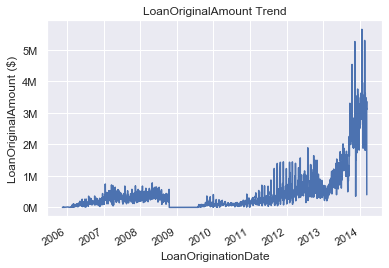

In [449]:
sub_df_agg.plot.line(x = 'LoanOriginationDate',y = sub_df_agg.values)
y_ticks = np.arange(0,6000000,1000000)
y_labels = [str(int(i/1000000))+'M'for i in y_ticks]
plt.yticks(y_ticks,y_labels)
plt.ylabel('LoanOriginalAmount ($)')
plt.title('LoanOriginalAmount Trend');

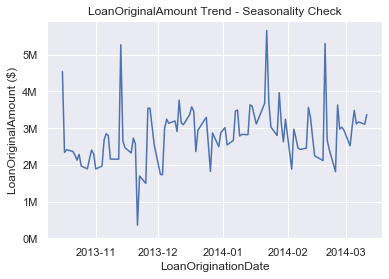

In [450]:
#check seasonality
sns.lineplot(x = sub_df_agg[-100:-1].index,y = sub_df_agg[-100:-1].values,);
sns.set()
y_ticks = np.arange(0,6000000,1000000)
y_labels = [str(int(i/1000000))+'M'for i in y_ticks]
plt.yticks(y_ticks,y_labels)
plt.ylabel('LoanOriginalAmount ($)')
plt.title('LoanOriginalAmount Trend - Seasonality Check');

In [472]:
sub_df = df[['LoanOriginalAmount','LoanOriginationDate']]
sub_df = sub_df.set_index('LoanOriginationDate')
sub_df_agg = sub_df.groupby('LoanOriginationDate')['LoanOriginalAmount'].sum()
y = sub_df_agg.resample('M').sum()
y.shape

(101,)

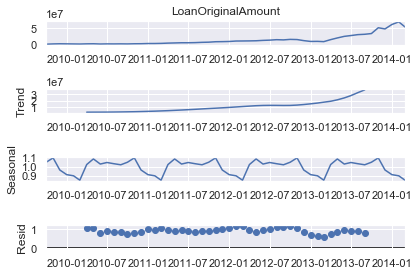

In [480]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(y[-55:-1], model='multiplicative').plot()
plt.savefig('After2010')

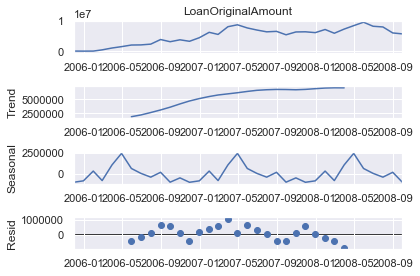

In [478]:
seasonal_decompose(y[0:35], model='addictive').plot()
plt.savefig('before200809')

#### How does the length of the loan (Term) affect the lenders Estimated Return?

According to the dataset, the lenders estimated return only applicable for loans originated after July 2009.

In [22]:
sub_df = df[['EstimatedReturn','BorrowerAPR','Term']]

In [23]:
sub_df.dropna(axis=0,inplace=True)
sub_df.shape

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(84853, 3)

In [24]:
sub_df.Term.value_counts()
sub_df.replace({'Term':{60:'5_year',36:'3_year',12:'1_year'}},inplace=True)

D:\anaconda3\lib\site-packages\pandas\core\generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [25]:
sub_df.groupby('Term')['EstimatedReturn'].describe()

,count,mean,std,min,25%,50%,75%,max
Term,,,,,,,,
1_year,1613.0,0.060680,0.025066,0.0146,0.04200,0.05630,0.0682,0.1270
3_year,58695.0,0.094762,0.031148,-0.1827,0.07192,0.09211,0.1150,0.2837
5_year,24545.0,0.101517,0.026798,0.0463,0.08027,0.09414,0.1214,0.1755


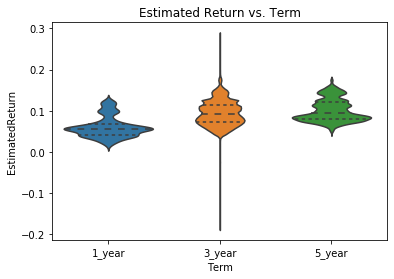

In [26]:
sns.violinplot(x='Term',y='EstimatedReturn',data=sub_df,inner='quartile', order=["1_year", "3_year", "5_year"])
plt.title('Estimated Return vs. Term');

For 1-year term loan, the expected return is 6.08%. Whilreas for the 3-year term loan, the lender can expected a 9.4% return. The highest expected return belongs to 5-year term loan which is 10.2%. Among all three kinds of loan, the 3-year term has a rather high variance while 1-year term loan and 5-year term loan are more stable.In conclusion, longer term are more likely to recieve a higher estimated return. Therefore the investor should considering to offer more 5-year term loans for client if possible.

#### Does being a homeowner affect the amount people borrow?

Hypothesis, being a homeowner does not affect the amount people borrow. I use $\mu_0$ and $\mu_1$  to present the average loan origincal amount for non-homeowner and homeowenr respectively.

Null hypothesis: $\mu_0 = \mu_1$, or $\mu_0-\mu_1 = 0$ 

Alternative hypothesis:  $\mu_0 \neq \mu_1$, or  $\mu_0-\mu_1 \neq 0$ 


In [27]:
sub_df = df[['IsBorrowerHomeowner','LoanOriginalAmount']]

In [30]:
org_nohome_mean =sub_df[sub_df.iloc[:,0] == False]['LoanOriginalAmount'].mean()
org_nohome_mean

7033.868293806125

In [31]:
org_home_mean =sub_df[sub_df.iloc[:,0] == True]['LoanOriginalAmount'].mean()
org_home_mean

9617.056560771078

In [32]:
obs_diff = org_home_mean - org_nohome_mean

In [33]:
nohome_means, home_means, diffs = [], [], []

for _ in range(10000):
    bootsamp = sub_df.sample(200, replace = True)
    home_mean = bootsamp[bootsamp.iloc[:,0] == True]['LoanOriginalAmount'].mean()
    nohome_mean = bootsamp[bootsamp.iloc[:,0] == False]['LoanOriginalAmount'].mean()
    # append the info 
    home_means.append(home_mean)
    nohome_means.append(nohome_mean)
    diffs.append(home_mean - nohome_mean)  

In [34]:
np.std(nohome_means),np.std(home_means),np.std(diffs)

(538.5626581874009, 673.3715315903484, 863.1017271377631)

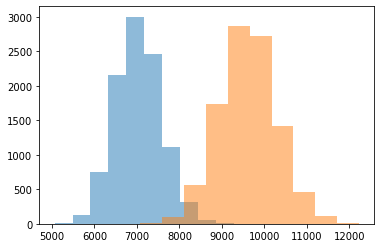

In [35]:
# check the statistic follows normal distribution.
plt.hist(nohome_means, alpha = 0.5);
plt.hist(home_means, alpha = 0.5); 

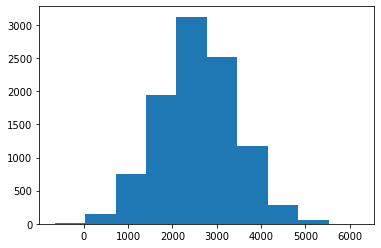

In [36]:
plt.hist(diffs);
std = np.std(diffs)

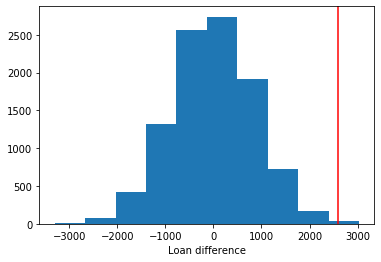

In [37]:
null_vals = np.random.normal(0, np.std(diffs), 10000)
plt.hist(null_vals)
plt.axvline(x=obs_diff,c='red')
plt.xlabel('Loan difference');

In [38]:
null_vals = np.array(null_vals)
p_val = (null_vals > obs_diff).mean()
p_val

0.0016

p value is less than 0.025. The p-value indicates that being a homeowner affect the amount of loan people borrow.

#### Who can get a large loan?

In [86]:
sub_df = df.iloc[:,27:45]
sub_df = pd.concat([sub_df,df['LoanOriginalAmount']],axis=1)
row, col = sub_df.shape
sub_df.head(5)

,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,LoanOriginalAmount
0,5,4,12,1,24.0,3,3,2,472,4,0,0,0,0.00,1500,11,0.81,0,9425
1,14,14,29,13,389.0,3,5,0,0,0,1,0,3989,0.21,10266,29,1.00,2,10000
2,0,0,3,0,0.0,0,1,1,0,0,0,0,0,NaN,0,0,NaN,0,3001
3,5,5,29,7,115.0,0,1,4,10056,14,0,0,1444,0.04,30754,26,0.76,0,10000
4,19,19,49,6,220.0,1,9,0,0,0,0,0,6193,0.81,695,39,0.95,2,15000


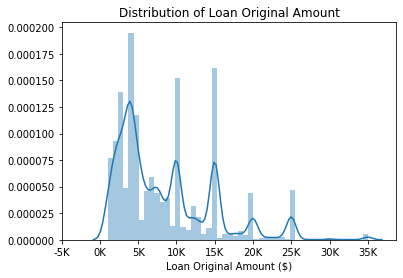

In [137]:
sns.distplot(sub_df.LoanOriginalAmount)
x_ticks = np.arange(-5000,40000,5000)
x_label = [str(int(i/1000))+'K' for i in x_ticks]
plt.xticks(ticks = x_ticks, labels = x_label)
plt.xlabel('Loan Original Amount ($)')
plt.title('Distribution of Loan Original Amount');

The distribution shows that the loan original amount peaks at 5K,10K,15K,20K,25K,30K and 35K, while there are tiny peaks between two high peaks. These peaks indicates that Prosper offers loan at different levels while borrowers have the flexibility to loan money between these levels.

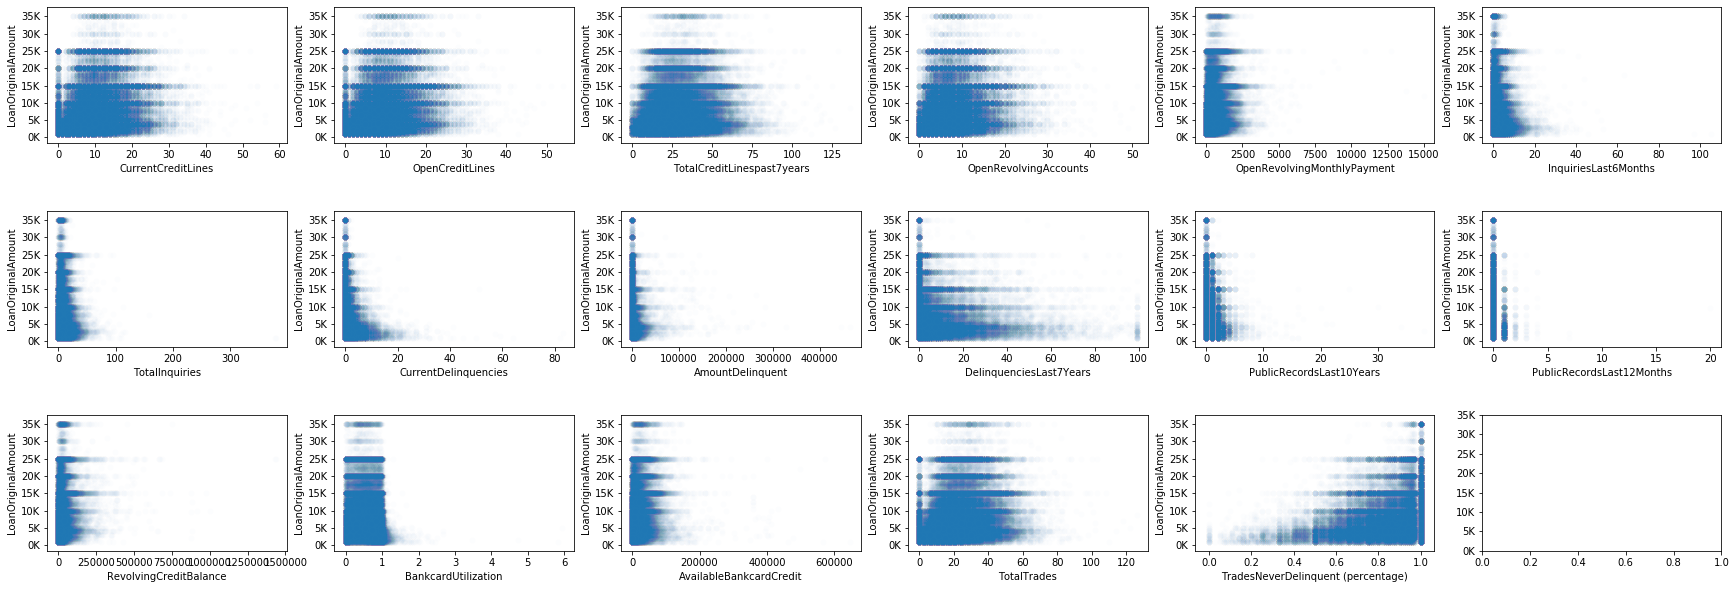

In [139]:
labels = list(sub_df.columns)[:-2]
fig, axs = plt.subplots(3,6,figsize=(30, 10))
fig.subplots_adjust(hspace=0.5,wspace=0.2)
y_ticks = np.arange(0,40000,5000)
y_label = [str(int(i/1000))+'K' for i in y_ticks]
plt.setp(axs,yticks = y_ticks, yticklabels = y_label)
for i in range(len(labels)):
    col = i%6
    row = int(i/6)
    sns.scatterplot(x = labels[i], y = 'LoanOriginalAmount', data = sub_df, ax = axs[row,col],alpha = 0.01)

In [140]:
fig.savefig('LoanOriginalAmount_analysis.png')

CreditLines vs. LoanOrignialAmount comments:

>The scatter plots show that a borrower with 10-20 current credit lines are more likely to borrow more money while it is almost impossible to apply for a loan if a borrower has more than 40 creditline at present. The borrowers with less than 5 credit lines tend to have a loan below 25K. In conclusion, Prosper should target the borrowers with 10-20 credit lines if promoting large loans.


Revolving vs. LoanOrignialAmount comments:
>The scatter plots show that the borrower with low monthly revolving payments are more likely to get a large loan, while the loan size have an uniform distribution in the revolving accounts interval 10-20. In conclusion, Prosper should target the borrowers with fewer debts if promoting large loans.

(0, 60)

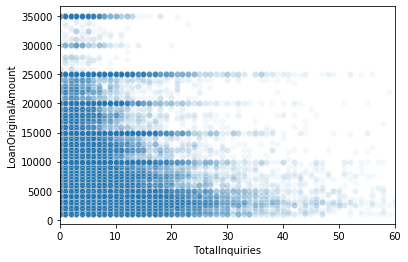

In [146]:
sns.scatterplot(x = 'TotalInquiries', y = 'LoanOriginalAmount', data = sub_df,alpha=0.05)
plt.xlim(0,60);

Inquiries vs. LoanOrignialAmount comments:
> It is more likely to get a large loan if the borrower have less than 15 inquiries within the last 6 months. 

Delinquet vs. LoanOrignialAmount comments:
>According to the plots, the borrowers with a small amount of delinquet and few delinquet records are more likely to get a large loan (35K). A borrower with more than 20 current delinquencies and/or more than 10K dollars loan(s) are almost impossible to get a loan.

Public records vs. LoanOriginalAmount comments:
>The large loan only avaiable for citizens with less or equal to 2 public records.

In conclusion, you are more likely to get a large loan if you meet the following criteria:
* Holding 10-20 current credit lines
* No open revolving monthly payment
* Fewer than 15 credit bureau inquiries within the last six months
* No delinquet
* Minimum of 2 public records

#### list category, lender yield, borrower states,

In [358]:
sub_df = df[['ListingCategory (numeric)','BorrowerState','LenderYield']]
sub_df.iloc[:,1:3]

,BorrowerState,LenderYield
0,CO,0.1380
1,CO,0.0820
2,GA,0.2400
3,GA,0.0874
4,MN,0.1985
...,...,...
113932,IL,0.1764
113933,PA,0.1010
113934,TX,0.2050
113935,GA,0.2505


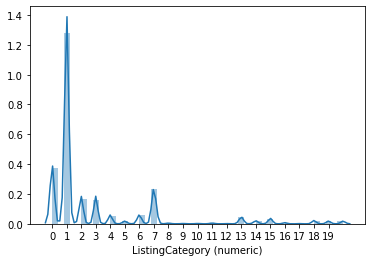

In [359]:
sns.distplot(df['ListingCategory (numeric)'])
x_ticks = np.arange(0,20,1)
plt.xticks(x_ticks,x_ticks);
plt.savefig('ListingCategory (numeric)')

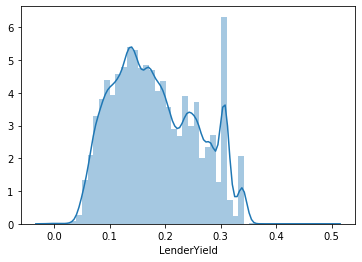

In [360]:
sns.distplot(df['LenderYield']);
plt.savefig('LenderYield')

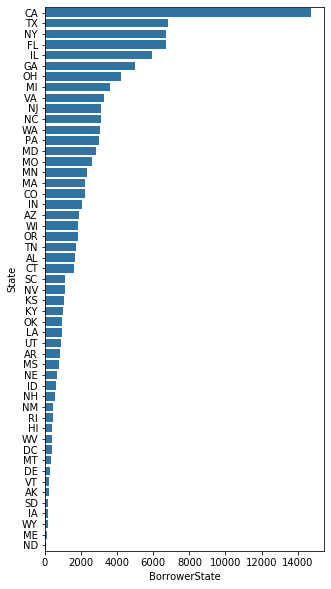

In [361]:
plt.figure(figsize=(5,10))
c = sns.color_palette()[0]
Br_df = df['BorrowerState'].value_counts().reset_index()
ax = sns.barplot(y = Br_df.iloc[:,0], x = Br_df.iloc[:,1],color=c,orient="h")
plt.ylabel('State');
plt.savefig('State')

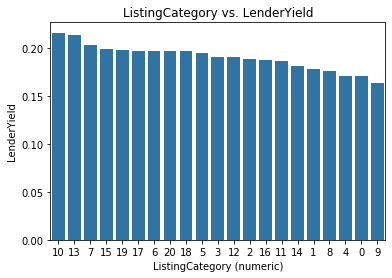

In [371]:
c = sns.color_palette()[0]
plot = sub_df.groupby('ListingCategory (numeric)').mean().sort_values(by='LenderYield',ascending=False)
lc_order=plot.index
sns.barplot(plot.index,plot.values.T[0],color = c,order=plot.index)
plt.ylabel('LenderYield')
plt.title('ListingCategory vs. LenderYield');
plt.savefig('ListingCategoryvs_LenderYield')

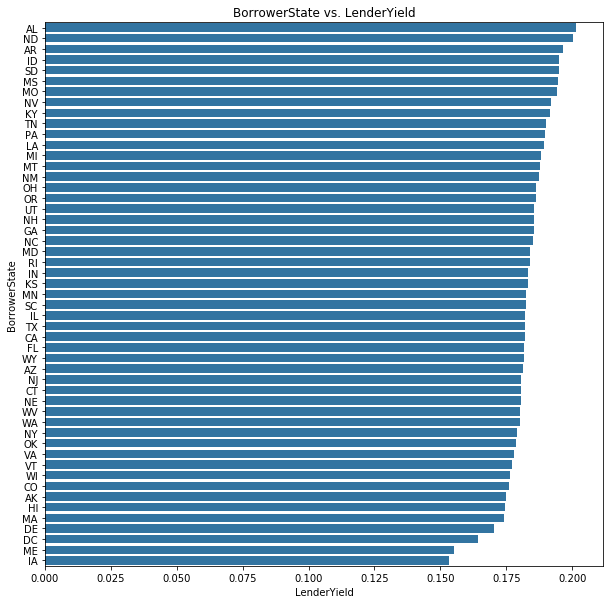

In [388]:
plt.figure(figsize=(10,10))
c = sns.color_palette()[0]
plot = sub_df.iloc[:,1:3].groupby('BorrowerState').mean().sort_values(by='LenderYield',ascending=False)
br_order=list(plot.index)
br_order.reverse()
sns.barplot(plot.values.T[0],plot.index,color = c,order=plot.index,orient='h');
plt.ylabel('BorrowerState')
plt.xlabel('LenderYield')
plt.title('BorrowerState vs. LenderYield');
plt.savefig('BorrowerStatevsLenderYield')

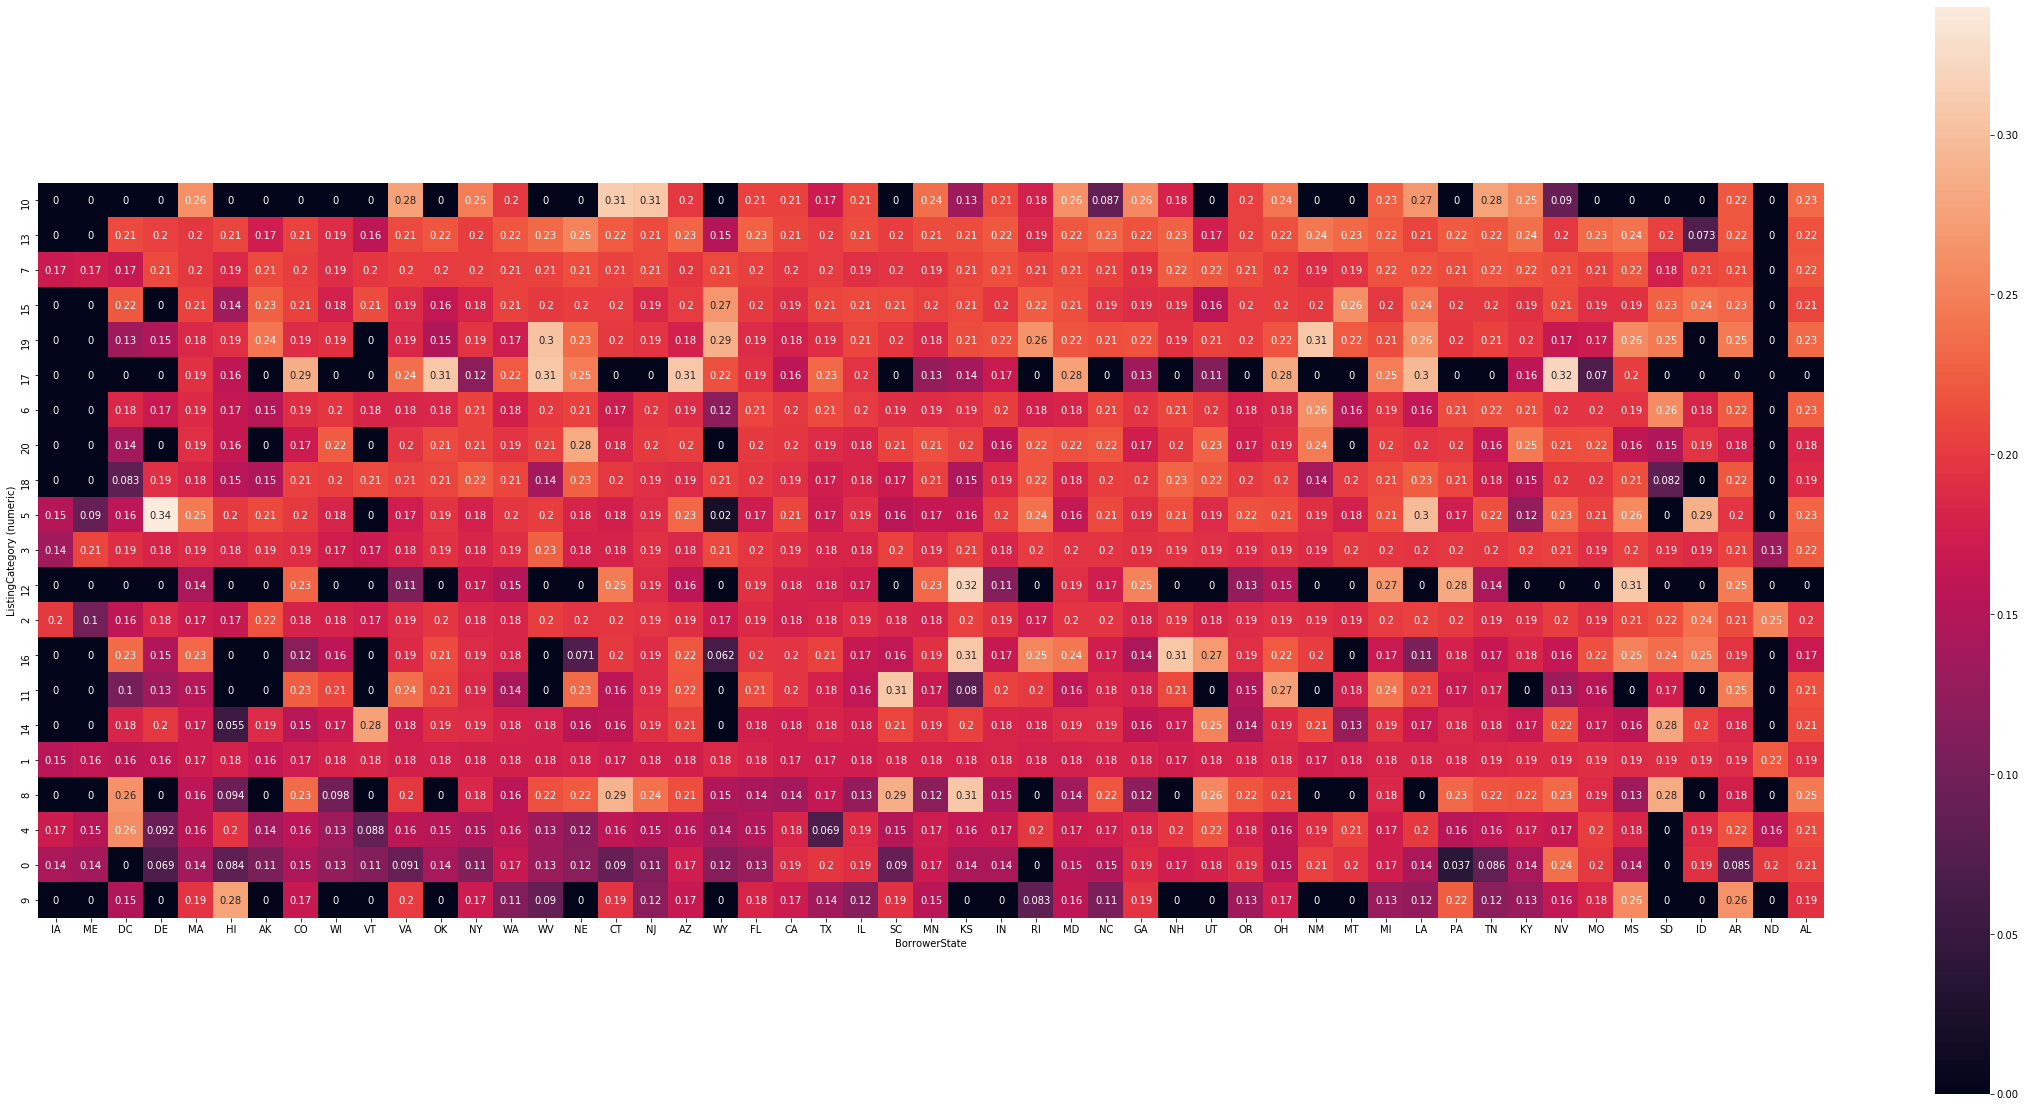

In [397]:
plt.figure(figsize=(40,20))
piv = pd.pivot_table(sub_df, values="LenderYield",index=["ListingCategory (numeric)"], columns=["BorrowerState"], fill_value=0)
piv = piv.reindex(index=lc_order, columns=br_order)
ax = sns.heatmap(piv, xticklabels=br_order,
    yticklabels=lc_order,square=True,annot=True,
    fmt='.2g')
plt.savefig('heat')

In [384]:
A = [11,2,3]
A.reverse()
A

[3, 2, 11]